## Задание 1 Лемматизации текста

Написать програмный модуль для лемматизации текста: лемматизировать текст и приписать леммам частеречные теги. Для решения задачи можно использовать как русские, так и английские словари.


**Ввод:** Не менее трех предложений вида "Токен1 токен2 ... токенN" с расставленными знаками препинания, разделенные переносом строки. 


**Вывод:** Для каждого предложения из входных данных написать вывод в виде
 "токен1{лемма1=тег1} токен2{лемма2= тег2} ... токенN{леммаN=тегN}" 
без исходных знаков препинания. Разделитель между токенами ‒ пробел. При лемматизации буквы е и ё, а также написание с прописной/строчной буквы признаются равноправными. Частеречные теги могут быть приведены к следующему инвентарю: 
- существительные (S), 
- прилагательные (A), 
- глаголы, в том числе причастия и деепричастия (V), 
- предлоги (PR), 
- союзы (CONJ), 
- сборная категория (ADV), включающая наречия, вводные слова, частицы, междометия.

В упрощенном варианте приведены к следующему инвентарю: 
- существительные (S), 
- прилагательные (A), 
- глаголы, в том числе причастия и деепричастия (V), 
- сборная категория (ADV), включающая наречия, вводные слова, частицы, междометия, предлоги, союзы.

In [239]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag


In [240]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(sentence):
    words = word_tokenize(sentence)
    tokenization = [word for word in words if word not in stop_words]
    return tokenization

In [241]:
import re

def remove_punctuation(sentence):
    no_punct_sentence = re.sub(r"[!()\[\]{};?@#$%:'\\,./^&;*_]", ' ', sentence)
    return no_punct_sentence

In [242]:
from nltk.tag import pos_tag


def lemmatize(sentences):
    for sentence in sentences:
        sentence = remove_punctuation(sentence)
        sentence = remove_stop_words(sentence)
    
        tagged_tokens = nltk.pos_tag(sentence)
        
        sentence_list = []
        lemmatizer = WordNetLemmatizer()
        for token_pair in tagged_tokens:
            word, tag = token_pair
            sentence_list.append(f"{word}{{{lemmatizer.lemmatize(word)}={tag}}} ")
        
        print(" ".join(sentence_list))

In [243]:
with open('check_lemmatizer.txt', 'r', encoding="utf-8") as f:
    text = f.read()
    

In [244]:
sentences = sent_tokenize(text)
lemmatize(sentences)

IN{IN=IN}  THE{THE=CD}  year{year=NN}  1878{1878=CD}  I{I=PRP}  took{took=VBD}  degree{degree=NN}  Doctor{Doctor=NNP}  Medicine{Medicine=NNP}  University{University=NNP}  London{London=NNP}  proceeded{proceeded=VBD}  Netley{Netley=NNP}  go{go=VB}  course{course=NN}  prescribed{prescribed=JJ}  surgeons{surgeon=NNS}  Army{Army=VBP} 
Having{Having=VBG}  completed{completed=VBN}  studies{study=NNS}  I{I=PRP}  duly{duly=VBP}  attached{attached=JJ}  Fifth{Fifth=NNP}  Northumberland{Northumberland=NNP}  Fusiliers{Fusiliers=NNP}  assistant{assistant=NN}  surgeon{surgeon=NN} 
The{The=DT}  regiment{regiment=NN}  stationed{stationed=VBD}  India{India=NNP}  time{time=NN}  I{I=PRP}  could{could=MD}  join{join=VB}  second{second=JJ}  Afghan{Afghan=NNP}  war{war=NN}  broken{broken=NN} 


## Задание 2 Разработка и тестирование метода автоматического реферирования.

**Вход:** 3 текстовых документов (прикреплены к заданию).

**Вывод:** 
1. Exstract из каждого документа по 3 предложения.
2. Exstract из 6 предложений из всех документов. 
3. Сделать выводы.

*В более сложном варианте Abstract.
Если вы выбираете вариант Abstract, то по 5 документам на входе нужно составить краткий и беглый реферат, содержащий самую важную информацию из входных документов. В этом определении "краткий" означает, что рефераты должны быть меньше входных документов, "беглый" означает, что они должны быть грамматически корректными и связными. "Важность" информации определяется из контекста и предметной области.

In [245]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.utils import get_stop_words

In [246]:
SENTENCES_COUNT = 3
LANGUAGE = "english"


def summarize(summarizer, file_name):
    parser = PlaintextParser.from_file(file_name, Tokenizer(LANGUAGE))
    summarizer.stop_words = get_stop_words(LANGUAGE)
    
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(sentence)

In [247]:
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.nlp.stemmers import Stemmer

stemmer = Stemmer(LANGUAGE)

lsa_summarizer = LsaSummarizer(stemmer)
text_rank_summarizer = TextRankSummarizer(stemmer)
luhn_summarizer = LuhnSummarizer(stemmer)

In [248]:
print("Summary of article 1 with LSA Summarizer: \n")
summarize(lsa_summarizer, "article1.txt")
print("-"*50)
print("Summary of article 1 with Text Rank Summarizer: \n")
summarize(text_rank_summarizer, "article1.txt")
print("-"*50)
print("Summary of article 1 with Luhn Summarizer: \n")
summarize(luhn_summarizer, "article1.txt")
print("-"*50)

Summary of article 1 with LSA Summarizer: 

With growing use of the World Wide Web, the revenue loss due to plagiarism and pirate copies has been escalating exponentially.
With respect to melody, Korea Entertainment law society conducted a survey to find out what people considered music plagiarism to be.
Section 4 represents symbolic melody similarity calculation based on string matching algorithm.
--------------------------------------------------
Summary of article 1 with Text Rank Summarizer: 

Then, it calculates the melody similarity to the music in the database and retrieves the plagiarized music.
The system receives as input a polyphonic music (PCM data) and outputs information of plagiarized music (music title, time, etc.).
In Similarity Calculation Modules, the similarity between the note sequence of the input polyphonic music and those of music in the database is calculated.
--------------------------------------------------
Summary of article 1 with Luhn Summarizer: 

Sectio

In [249]:
print("Summary of article 2 with LSA Summarizer: \n")
summarize(lsa_summarizer, "article2.txt")
print("-"*50)
print("Summary of article 2 with Text Rank Summarizer: \n")
summarize(text_rank_summarizer, "article2.txt")
print("-"*50)
print("Summary of article 2 with Luhn Summarizer: \n")
summarize(luhn_summarizer, "article2.txt")
print("-"*50)

Summary of article 2 with LSA Summarizer: 

Introduction Recently, the use of various types of multimedia data such as images, videos, and audios has shown its explosive growth, so the content-based search became of great importance[12][7][13][5][4][3].
Music Plagiarism Detection Using Melody Databases 685 • A three-step query processing: it provides fast search ability by taking a three-step query processing method, which consists of index searching, window stitching, and post-processing.
With our plagiarism detection system, composers can easily search for the melodies similar to their ones from music databases.
--------------------------------------------------
Summary of article 2 with Text Rank Summarizer: 

In this paper, we address the development of a system that detects plagiarism based on the similar melody searching, which is an operation that finds the melodies similar to a given query melody from a music database.
Music Plagiarism Detection Using Melody Databases 685 • A t

In [250]:
print("Summary of article 3 with LSA Summarizer: \n")
summarize(lsa_summarizer, "article3.txt")
print("-"*50)
print("Summary of article 3 with Text Rank Summarizer: \n")
summarize(text_rank_summarizer, "article3.txt")
print("-"*50)
print("Summary of article 3 with Luhn Summarizer: \n")
summarize(luhn_summarizer, "article3.txt")
print("-"*50)

Summary of article 3 with LSA Summarizer: 

The idea is that treating the time-frequency representation as a texture image we can extract features to build reliable music genre classification systems.
Furthermore, for applications such as radio monitoring, search times on the order of a few milliseconds per query are attained, even on a massive music database.
The idea is that treating the time-frequency representation as a texture image we can extract features to build reliable music genre classification systems.
--------------------------------------------------
Summary of article 3 with Text Rank Summarizer: 

Music plagiarism is an insult to these peoples work because the plagiarizer doesnt know the blood sweat and toil that goes into one song.
Abstract: Music plagiarism detector is an alternative approach for music genre classification which converts the audio signal into spectrograms and then extracts features from this visual representation.
Abstract: Music plagiarism detector i

In [251]:
file_names = ['article1.txt', 'article2.txt', 'article3.txt']

output_file = 'combined.txt'

with open(output_file, 'w') as outfile:
    for file_name in file_names:
        with open(file_name, 'r') as infile:
            outfile.write(infile.read() + "\n") 


In [252]:
SENTENCES_COUNT = 6

print("Summary of combined articles with LSA Summarizer: \n")
summarize(lsa_summarizer, "combined.txt")
print("-"*50)
print("Summary of combined articles with Text Rank Summarizer: \n")
summarize(text_rank_summarizer, "combined.txt")
print("-"*50)
print("Summary of combined articles with Luhn Summarizer: \n")
summarize(luhn_summarizer, "combined.txt")
print("-"*50)

Summary of combined articles with LSA Summarizer: 

With respect to melody, Korea Entertainment law society conducted a survey to find out what people considered music plagiarism to be.
Introduction Recently, the use of various types of multimedia data such as images, videos, and audios has shown its explosive growth, so the content-based search became of great importance[12][7][13][5][4][3].
The idea is that treating the time-frequency representation as a texture image we can extract features to build reliable music genre classification systems.
The proposed approach also takes into account a zoning mechanism to perform local feature extraction, which has been proved to be quite efficient.
The idea is that treating the time-frequency representation as a texture image we can extract features to build reliable music genre classification systems.
The proposed approach also takes into account a zoning mechanism to perform local feature extraction, which has been proved to be quite efficie

**Вывод**

Text Rank Summarizer не берёт в расчет дупликаты предложений, и если это предложение имеет высокий ранк, то его дупликаты тоже будут иметь высокий ранк.

## Задача 3 Разработка и тестирование определения тональности текста.
**Ввод:** Предложение для оценки эмоциональной окраски.

**Вывод:** Тональность заданного предложения по шкале негативный, нейтральный, позитивный.

Вы можете использовать подход на основе словаря тонально окрашенных слов (например, SentiWords) или обучить классификатор на тренировочных данных. Вы можете использовать тренировочные данные и в первом случае – чтобы подобрать пороги для классификации предложений на основе весов словаря. 

Постройте матрицу ошибок (confusion matrix) на тестовом наборе. Оцените правильность (accuracy, доля правильно классифицированных предложений) классификатора на тестовом наборе. Проанализируйте неверно классифицированные предложения, сделайте предположения о причинах неверной классификации, предложите улучшения.

In [253]:
from textblob import download_corpora

In [254]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\nural\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nural\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nural\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nural\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\nural\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\nural\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [255]:
from textblob import TextBlob

def text_blob_determine_sentiment(text):
    # Создаем объект TextBlob с анализируемым текстом
    text_analysis = TextBlob(text)

    # Определяем тональность
    if text_analysis.sentiment.polarity > 0.01:
        return 1
    elif text_analysis.sentiment.polarity < -0.01:
        return -1
    else:
        return 0

In [256]:
import spacy

In [257]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nlp = spacy.load("en_core_web_sm")

analyzer = SentimentIntensityAnalyzer()

def vader_determine_sentiment(text):
    # Обработка текста с помощью spaCy
    doc = nlp(text)
    sentiment = analyzer.polarity_scores(text)# Вычисляем тональность с помощью vaderSentiment

    # Определяем тональность на основе результатов анализа
    if sentiment['compound'] >= 0.05:
        return 1
    elif sentiment['compound'] <= -0.05:
        return -1
    else:
        return 0

In [258]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Загрузите пакет данных для VADER Sentiment Analyzer
nltk.download('vader_lexicon')

# Создайте анализатор тональности
analyzer = SentimentIntensityAnalyzer()

def nltk_determine_sentiment(text):
    # Анализируем текст и получаем оценки тональности
    sentiment_scores = analyzer.polarity_scores(text)
    # Определяем тональность на основе compound score
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 1
    elif compound_score <= -0.05:
        return -1
    else:
        return 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nural\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [259]:
sentences = [
    ("I absolutely love this product!", 1),
    ("This is the worst service I have ever received.", -1),
    ("The presentation was well-executed.", 1),
    ("The food was terrible and cold.", -1),
    ("I'm really happy with the results.", 1),
    ("The room was dirty and smelled awful.", -1),
    ("The movie exceeded my expectations.", 1),
    ("The customer support was very unhelpful.", -1),
    ("I can't believe how good this tastes!", 1),
    ("The manager's behavior was unacceptable.", -1),
    ("I’m thrilled with how the project turned out!", 1),
    ("This is a complete disaster!", -1),
    ("The service here is excellent!", 1),
    ("It's just an average day.", 0),
    ("The staff was neither friendly nor rude.", 0),
    ("The packaging is beautiful and high quality.", 1),
    ("The meeting was very uneventful.", 0),
    ("My experience was absolutely horrible.", -1),
    ("I am extremely satisfied with my purchase.", 1),
    ("The device stopped working after a week.", -1)
]


In [260]:
from sklearn.metrics import confusion_matrix

true_sentiments = [sentiment for sentence, sentiment in sentences]

predicted_sentiments_nltk = [nltk_determine_sentiment(sentence) for sentence, sentiment in sentences]

predicted_sentiments_textblob = [text_blob_determine_sentiment(sentence) for sentence, sentiment in sentences]

predicted_sentiments_vader = [vader_determine_sentiment(sentence) for sentence, sentiment in sentences]

cm_nltk = confusion_matrix(true_sentiments, predicted_sentiments_nltk)
cm_tb = confusion_matrix(true_sentiments, predicted_sentiments_textblob)
cm_vader = confusion_matrix(true_sentiments, predicted_sentiments_vader)


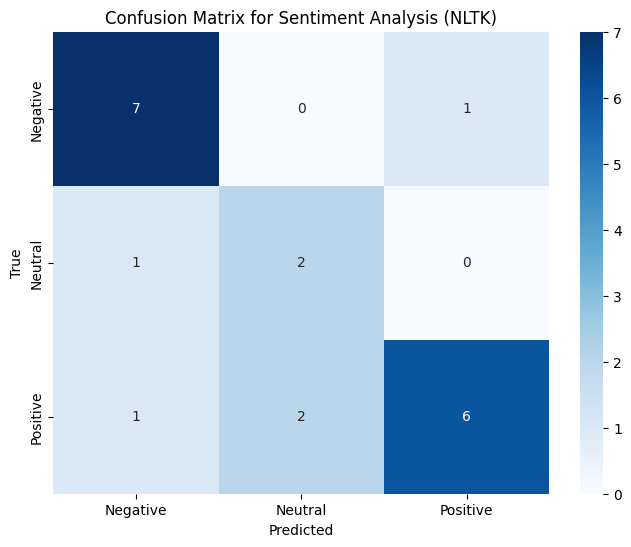

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm_nltk, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sentiment Analysis (NLTK)')
plt.show()

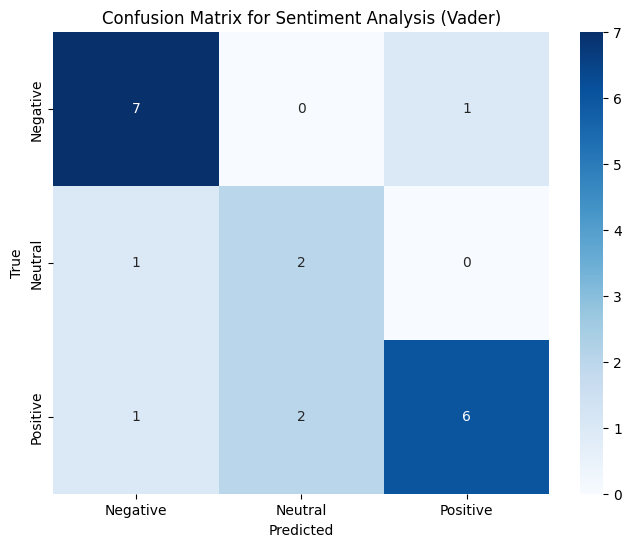

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm_vader, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sentiment Analysis (Vader)')
plt.show()

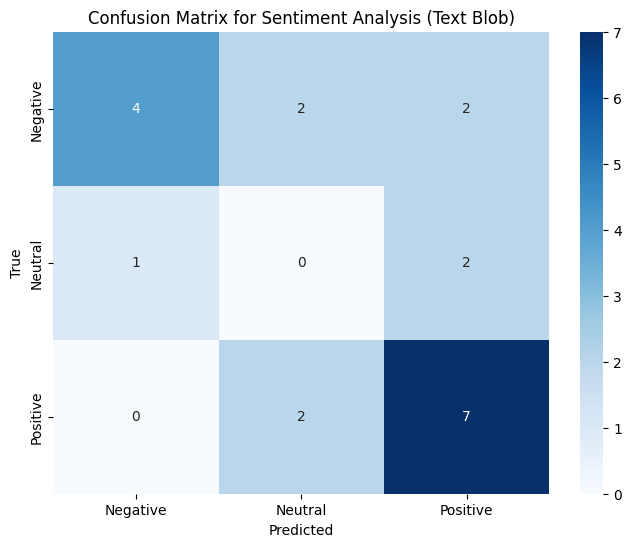

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm_tb, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Sentiment Analysis (Text Blob)')
plt.show()

## Задание 4 Разработка и тестирование методов выделения упоминаний о чем либо в тексте

Разработать программный модуль для сбора данных о текстах песен и их анализа. Для анализа взять минимум 4 жанра по минимум 10 песен. Исключить служебные слова. 

Определить: 

1. Десять наиболее часто встречающихся слов для каждого жанра песен;
2. Наиболее часто встречающиеся слова из определенной категории для каждого жанра песен. Примеры категорий: упоминаний времени суток, сезонов года, частей тела, грамматических категорий и т.п.;
3. Слова, которые встречаются в каждом жанре песен не более 3 раз.

In [279]:
with open("rock_songs.txt", "r") as file:
    rock_lyrics = file.read()
len(rock_lyrics)

14784

In [265]:
rock_lyrics = rock_lyrics.lower()
rock_lyrics= remove_punctuation(rock_lyrics)
tokenized_rock_lyrics = remove_stop_words(rock_lyrics)

In [280]:
from collections import Counter

def get_top_words(lyrics, n=10):
    words = [word for word in lyrics.split() if word not in stop_words]
    return Counter(words).most_common(n)

In [281]:
get_top_words(rock_lyrics)

[('I', 63),
 ("I'm", 38),
 ('back', 25),
 ('And', 22),
 ('hello,', 21),
 ('go', 18),
 ('got', 14),
 ('A', 14),
 ('Ooh,', 13),
 ('love', 13)]

In [268]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'any', 'wasn', 'few', 'now', 'themselves', 'more', 'his', "that'll", 'at', 'won', 'most', "isn't", 'who', 'this', 'i', 'he', 'it', 'when', 'where', 'o', 'has', 'before', 'during', 'than', 'its', 'in', 'just', 'not', 'ours', 'me', 'what', 'own', 'again', 'so', 'yours', 'while', 'up', 'on', 'shan', "wouldn't", 'she', 'further', "haven't", 'our', 'doesn', 'needn', 'aren', 'ain', 'didn', 'because', 'until', 'should', 'that', 'mustn', 'be', "hasn't", 'same', 'yourself', 'under', 'through', "shan't", 'we', 'below', 'an', 'are', 've', 'did', "didn't", "she's", 'you', 'only', "couldn't", "wasn't", 'them', 'were', 'yourselves', 'but', 'by', 'theirs', 'about', 'y', 'himself', 'shouldn', 'how', 'ma', 'against', 'myself', 'don', 'as', "mustn't", "mightn't", 'the', 'these', 's', "you'd", 'ourselves', 'for', 'itself', 'weren', 'had', 'into', 'between', 'other', 'is', 'hadn', 'out', 'was', 'very', 'both', 'above', 'their', 'being', "you're", 'to', 'does', 'isn', 'having', "don't", 'herself', 'those'

In [282]:
from collections import Counter

def most_common_category_words(lyrics, category_words):
    # Filter only words from the category
    category_mentions = [word for word in lyrics if word in category_words]

    # Count frequency of words in the category
    word_count = Counter(category_mentions)
    print(word_count)
    

    # Get the most common word(s) in the category
    if word_count:
        return word_count.most_common(1)[0]  # Return the most frequent word
    else:
        return None  # No category words found


In [283]:
time_of_day = ["morning", "noon", "afternoon", "evening", "night", "midnight", "dawn", "dusk"]

seasons = ["winter", "spring", "summer", "autumn", "fall"]

body_parts = ["hand", "face", "eyes", "heart", "head", "leg", "arm", "lips", "mouth", "feet", "hair", "skin"]

emotions = ["love", "hate", "joy", "sadness", "anger", "fear", "happiness", "sorrow", "excitement"]

weather = ["rain", "sunshine", "storm", "wind", "snow", "cloud", "thunder", "lightning", "fog", "heat"]

places = ["city", "town", "home", "street", "road", "house", "sky", "ocean", "sea", "mountain", "valley"]

colors = ["red", "blue", "green", "yellow", "black", "white", "purple", "orange", "pink", "brown"]

general_time = ["day", "night", "week", "month", "year", "hour", "minute", "second"]

nature = ["tree", "river", "flower", "forest", "hill", "beach", "desert", "sky", "moon", "sun", "stars"]

movements = ["run", "walk", "dance", "fly", "swim", "jump", "fall", "rise", "sit", "stand", "drive", "ride"]


In [284]:
print(most_common_category_words(tokenized_rock_lyrics, movements))
print(most_common_category_words(tokenized_rock_lyrics, general_time))
print(most_common_category_words(tokenized_rock_lyrics, places))

Counter({'run': 8, 'stand': 3, 'dance': 3, 'walk': 2, 'ride': 1, 'drive': 1})
('run', 8)
Counter({'night': 5, 'day': 3, 'year': 2})
('night', 5)
Counter({'sky': 6, 'road': 2, 'home': 2, 'house': 1, 'town': 1})
('sky', 6)


In [285]:
def get_rare_words(lyrics, max_count=3):
    words = [word for word in lyrics.split() if word not in stop_words]
    return [word for word, count in Counter(words).items() if count <= max_count]


In [286]:
get_rare_words(rock_lyrics)

['"Stairway',
 'Heaven"',
 'lady',
 "who's",
 'sure',
 'glitters',
 'gold',
 'buying',
 'gets',
 'knows,',
 'stores',
 'closed',
 'word',
 'came',
 'ooh,',
 'sign',
 'wall,',
 'wants',
 'sometimes',
 'words',
 'two',
 'meanings',
 'tree',
 'brook,',
 "there's",
 'songbird',
 'sings',
 'Sometimes',
 'thoughts',
 'misgiven',
 'feeling',
 'west',
 'spirit',
 'crying',
 'leaving',
 'seen',
 'rings',
 'smoke',
 'trees',
 'voices',
 'stand',
 'looking',
 'whispered',
 'soon',
 'call',
 'tune',
 'Then',
 'piper',
 'lead',
 'reason',
 'new',
 'day',
 'dawn',
 'forests',
 'echo',
 'laughter',
 'Oh-oh-oh-oh-whoa',
 'If',
 'bustle',
 'hedgerow,',
 'alarmed,',
 'spring',
 'clean',
 'May',
 'queen',
 'paths',
 'by,',
 'still',
 'change',
 'road',
 'whoa',
 'head',
 'humming',
 'go,',
 'case',
 "piper's",
 'calling',
 'join',
 'Dear',
 'lady,',
 'blow?',
 'lies',
 'whispering',
 'wind?',
 'Our',
 'shadows',
 'taller',
 'soul',
 'walks',
 'Who',
 'shines',
 'white',
 'light',
 'How',
 'everything',
 

In [287]:
with open("hip_hop_songs.txt", "r") as file:
    hip_hop_lyrics = file.read()
len(hip_hop_lyrics)
hip_hop_lyrics = hip_hop_lyrics.lower()
hip_hop_lyrics = remove_punctuation(hip_hop_lyrics)
remove_stop_words(hip_hop_lyrics)

['``',
 'c',
 'r',
 'e',
 '``',
 'raekwon',
 'method',
 'man',
 'nigga',
 'want',
 'god',
 'word',
 'look',
 'cops',
 'though',
 'wu-tang',
 'five',
 'finger',
 'shit',
 'fam',
 'cash',
 'rules-',
 'word',
 'two',
 'fives',
 'baby',
 'word',
 'two',
 'fives',
 'niggas',
 'got',
 'garbage',
 'way',
 'word',
 'know',
 'sayin',
 'cash',
 'rules',
 'everything',
 'around',
 'c',
 'r',
 'e',
 'get-',
 'yeah',
 'check',
 'old',
 'fly',
 'shit',
 'word',
 'cash',
 'rules',
 'everything',
 'around',
 'take',
 'natural',
 'joint',
 'c',
 'r',
 'e',
 'get',
 'money',
 'dollar',
 'dollar',
 'bill',
 'go',
 'check',
 'shit',
 'yo',
 'raekwon',
 'grew',
 'crime',
 'side',
 'new',
 'york',
 'times',
 'side',
 'stayin',
 'alive',
 'jive',
 'secondhands',
 'mom',
 'bounced',
 'old',
 'man',
 'moved',
 'shaolin',
 'land',
 'young',
 'youth',
 'yo',
 'rockin',
 'gold',
 'tooth',
 'lo',
 'goose',
 'way',
 'begin',
 'g',
 'drug',
 'loot',
 'let',
 'start',
 'like',
 'son',
 'rollin',
 'one',
 'one',
 'pul

In [288]:
get_top_words(hip_hop_lyrics, 20)

[('like', 68),
 ('rock', 66),
 ('got', 62),
 ('get', 58),
 ('know', 44),
 ('stop', 41),
 ('cause', 33),
 ('gotta', 29),
 ('say', 27),
 ('see', 26),
 ('dollar', 24),
 ('good', 24),
 ('yeah', 23),
 ('money', 23),
 ('go', 23),
 ('let', 22),
 ('one', 22),
 ('make', 22),
 ('back', 22),
 ('nigga', 21)]